In [56]:
#2

In [57]:
#Importing necessary libraraies
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [58]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv')

In [59]:
df.shape

(158, 12)

In [60]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [61]:
d=df.dtypes
d

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [63]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [35]:
#NO NULL


In [36]:
#Also,  country and region and standard error dont add any refrence to score. Hence dropping it
#Happiness Rank also nominal in nature, so dropping it


In [64]:
df.drop(['Country','Region','Happiness Rank'],axis=1,inplace=True)
df

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


VISUALIZATION

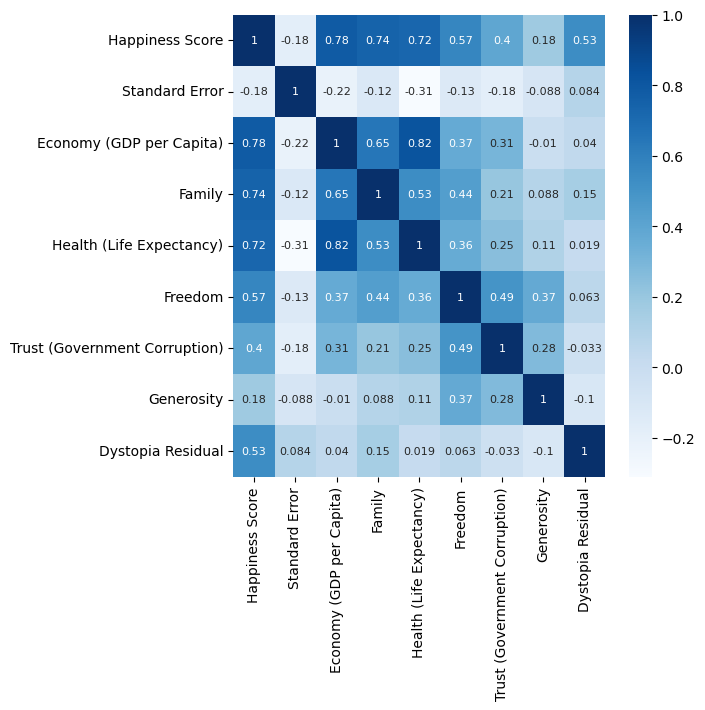

In [65]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True,annot_kws={"size":8},cmap="Blues")
plt.show()

In [44]:
#GDP,family and health is highly positively correlated with score. A high GDP or health or family support will bring more happiness.
#Freedom,Dystopia Residual is moderately postive correlated to score
#Trust,Generosity shows weak correlation to score
#Standard error is weak negative correlation


array([[<AxesSubplot:title={'center':'Happiness Score'}>,
        <AxesSubplot:title={'center':'Standard Error'}>,
        <AxesSubplot:title={'center':'Economy (GDP per Capita)'}>],
       [<AxesSubplot:title={'center':'Family'}>,
        <AxesSubplot:title={'center':'Health (Life Expectancy)'}>,
        <AxesSubplot:title={'center':'Freedom'}>],
       [<AxesSubplot:title={'center':'Trust (Government Corruption)'}>,
        <AxesSubplot:title={'center':'Generosity'}>,
        <AxesSubplot:title={'center':'Dystopia Residual'}>]], dtype=object)

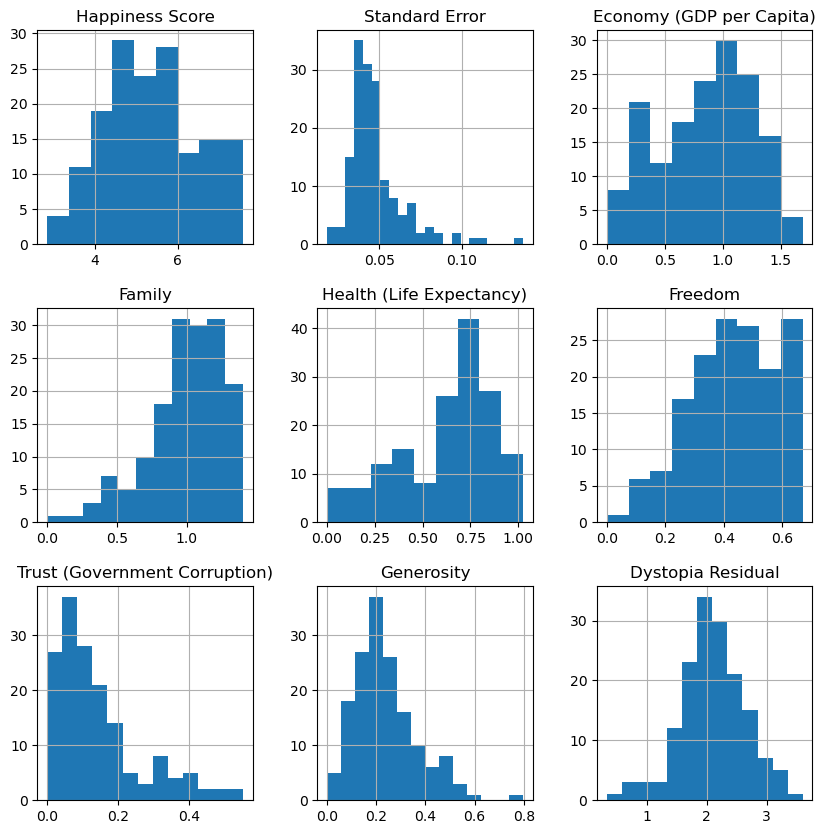

In [66]:
df.hist(bins='auto',figsize=(10,10))

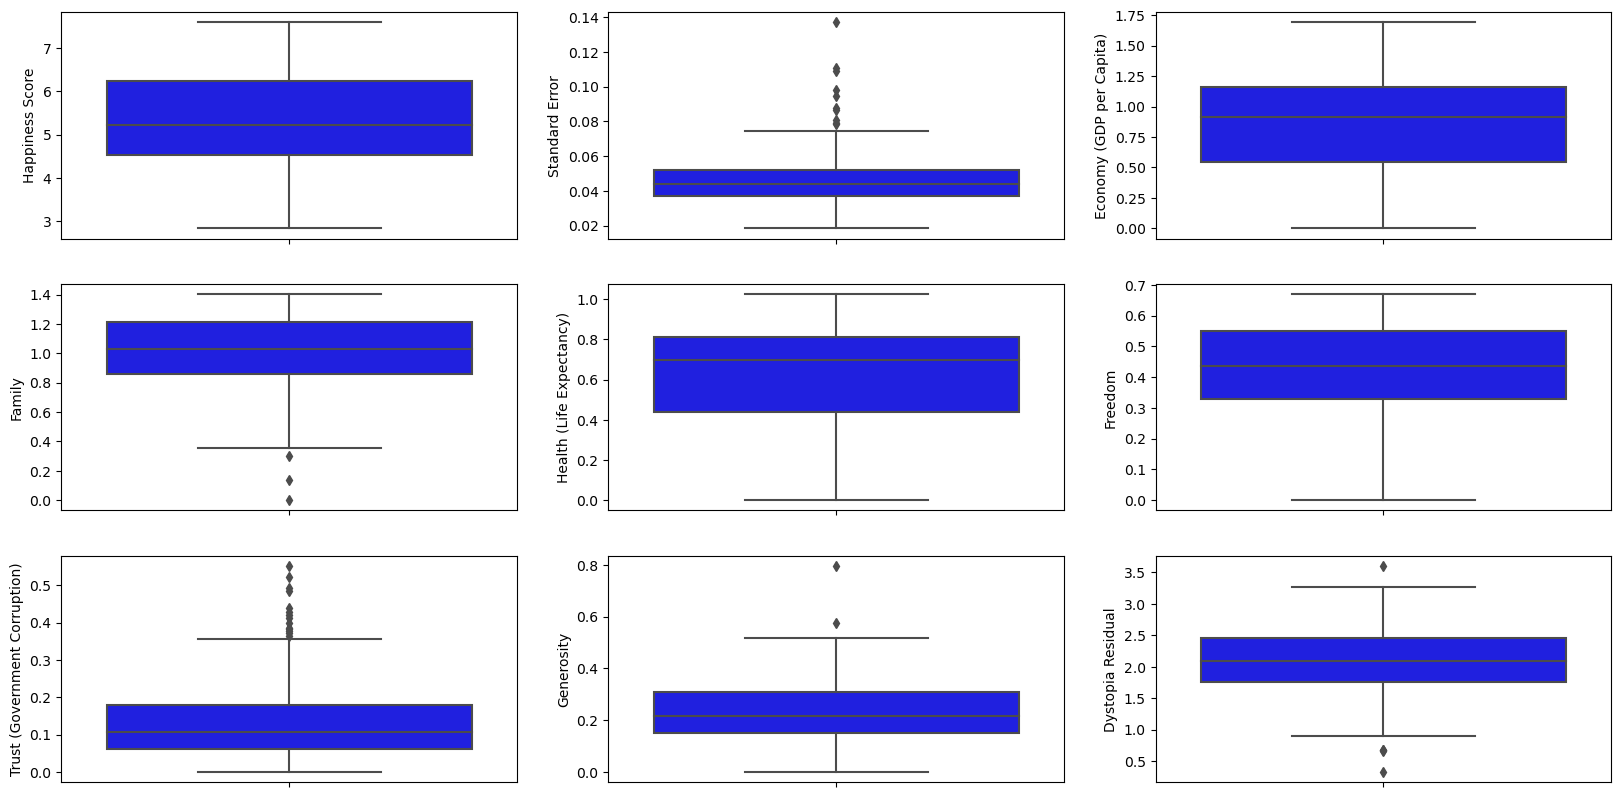

In [67]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, color='b', ax=ax[index])
    index += 1
plt.show()

In [47]:
#we see outliers in family,trust and generosity

In [68]:
df.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [95]:
#We understand through histogram and skew that data is skewed in standard error,family,trust,dystopia and generosity.
#hence we will use IQR method for outlier removal

In [71]:
def mod_outlier(df):
        df1 = df.copy()
        df = df._get_numeric_data()
        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)


        for col in df.columns:
            for i in range(0,len(df[col])):
                if df[col][i] < lower_bound[col]:            
                    df[col][i] = lower_bound[col]

                if df[col][i] > upper_bound[col]:            
                    df[col][i] = upper_bound[col]    


        for col in df.columns:
            df1[col] = df[col]

        return(df1)

df=mod_outlier(df)


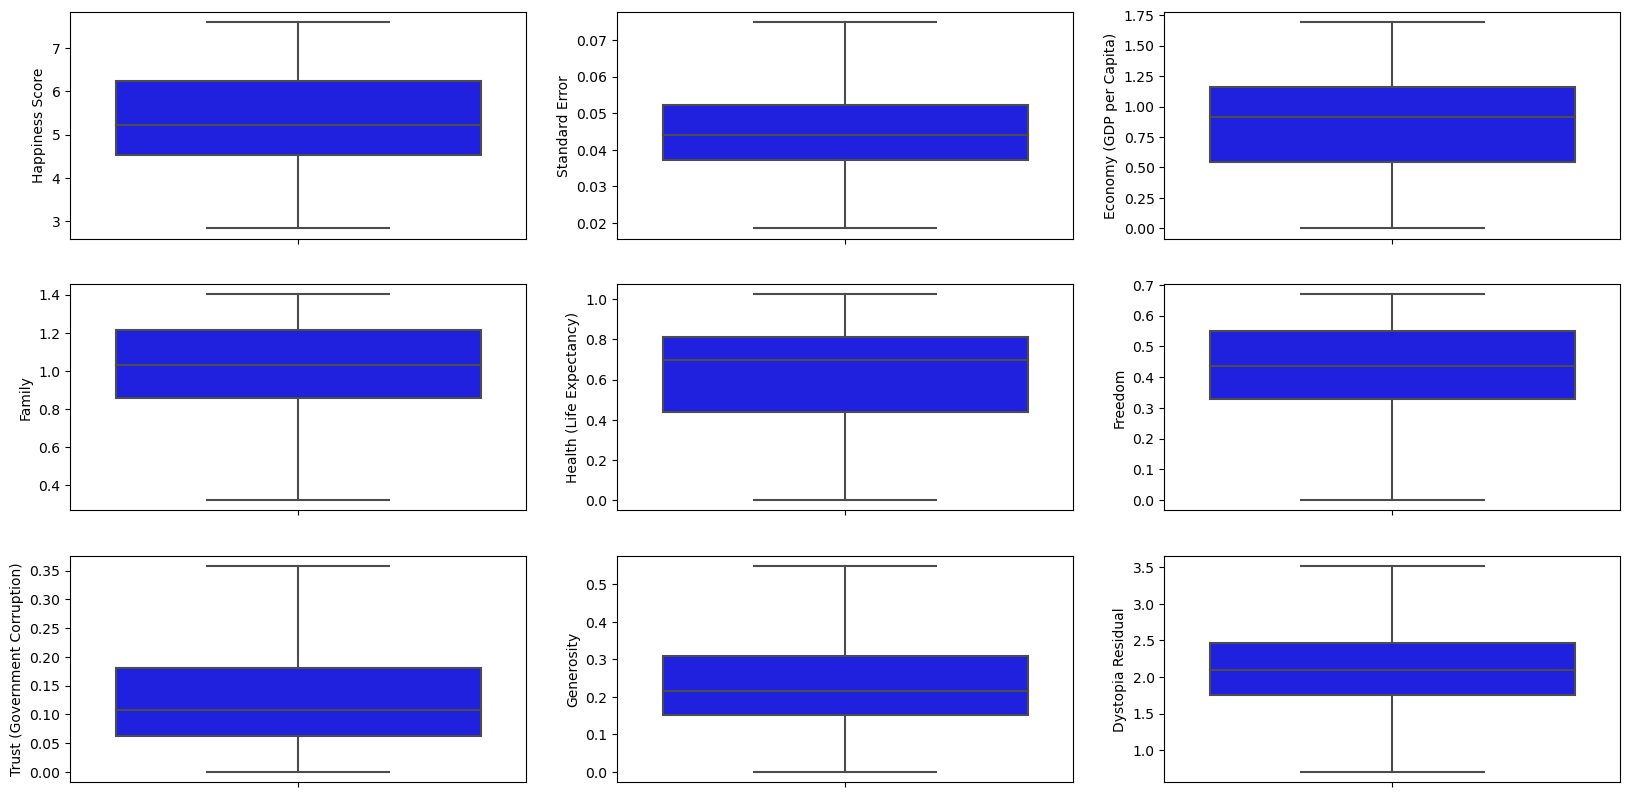

In [72]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, color='b', ax=ax[index])
    index += 1
plt.show()

In [60]:
#SCALING DATA and SPLITTING DATA

In [73]:
X=df.drop(columns=['Happiness Score'],axis=1)
X

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.034110,1.39651,1.349510,0.94143,0.66557,0.358125,0.29678,2.517380
1,0.048840,1.30232,1.402230,0.94784,0.62877,0.141450,0.43630,2.702010
2,0.033280,1.32548,1.360580,0.87464,0.64938,0.358125,0.34139,2.492040
3,0.038800,1.45900,1.330950,0.88521,0.66973,0.358125,0.34699,2.465310
4,0.035530,1.32629,1.322610,0.90563,0.63297,0.329570,0.45811,2.451760
...,...,...,...,...,...,...,...,...
153,0.034640,0.22208,0.773700,0.42864,0.59201,0.358125,0.22628,0.704902
154,0.036560,0.28665,0.353860,0.31910,0.48450,0.080100,0.18260,1.633280
155,0.050150,0.66320,0.474890,0.72193,0.15684,0.189060,0.47179,0.704902
156,0.074849,0.01530,0.415870,0.22396,0.11850,0.100620,0.19727,1.833020


In [74]:
y=df['Happiness Score']
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

In [75]:
scaler=MinMaxScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.277281,0.826132,0.951266,0.918244,0.993789,1.000000,0.540704,0.644546
1,0.538596,0.770412,1.000000,0.924496,0.938841,0.394974,0.794895,0.710204
2,0.262557,0.784113,0.961499,0.853099,0.969615,1.000000,0.621978,0.635535
3,0.360483,0.863099,0.934109,0.863409,1.000000,1.000000,0.632181,0.626030
4,0.302473,0.784592,0.926399,0.883326,0.945112,0.920265,0.834631,0.621211
...,...,...,...,...,...,...,...,...
153,0.286684,0.131376,0.418986,0.418083,0.883953,1.000000,0.412260,0.000000
154,0.320745,0.169573,0.030885,0.311241,0.723426,0.223665,0.332679,0.330146
155,0.561836,0.392329,0.142766,0.704150,0.234184,0.527916,0.859554,0.000000
156,1.000000,0.009051,0.088208,0.218444,0.176937,0.280963,0.359406,0.401177


In [76]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

MODEL TRAINING

In [77]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [78]:
svm=SVR()
svm.fit(X_train,y_train)
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [79]:
print(f'Regression Performance',{lr.score(X_test,y_test)})

Regression Performance {0.9980736285441372}


In [80]:
svm_model=svm.predict(X_test)
rf_model=rf.predict(X_test)
gbr_model=gbr.predict(X_test)

In [81]:
print(f'Regression Performance thru SVM',{svm.score(X_test,y_test)},f'Regression Performance thru RF',{rf.score(X_test,y_test)},f'Regression Performance thru GBR',{gbr.score(X_test,y_test)})

Regression Performance thru SVM {0.96181856076194} Regression Performance thru RF {0.9132443658273743} Regression Performance thru GBR {0.9505920156323833}


In [89]:
#we find that Linear Regression gives the best model

TEST PREDICTION

In [82]:
lr_model=lr.predict(X_test)
lr_model

array([4.0133158 , 6.02390309, 4.1733104 , 2.83816673, 5.0065621 ,
       6.60519449, 4.89440459, 4.8450283 , 4.90434542, 3.92426232,
       6.91564689, 5.84429001, 7.02809716, 5.5882857 , 6.80498801,
       6.52894162, 4.49208949, 4.62564228, 4.96934182, 5.68989129,
       3.63881275, 6.98089066, 7.23193455, 7.32150402, 6.52012275,
       5.20562383, 5.89225019, 3.94547371, 4.34907863, 3.65039343,
       3.749993  , 5.33774016, 3.99091592, 5.85514026, 4.32736505,
       5.12205433, 3.29931087, 6.12772896, 5.62397431, 4.53518092,
       6.66893778, 4.01190799, 5.24518952, 3.61754915, 6.29988425,
       5.28764464, 6.84315695, 4.20427319])

In [83]:
df1=pd.DataFrame({'Actual':y_test,'Linear Regression':lr_model})
df1

,Actual,Linear Regression
128,4.307,4.013316
45,5.987,6.023903
134,4.194,4.173310
156,2.905,2.838167
90,5.057,5.006562
29,6.574,6.605194
96,4.898,4.894405
98,4.876,4.845028
95,4.949,4.904345
140,3.931,3.924262


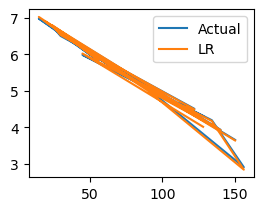

In [84]:
plt.subplot(221)#2X2 grid format
plt.plot(df1['Actual'].iloc[0:21],label='Actual')
plt.plot(df1['Linear Regression'].iloc[0:21],label='LR')
plt.legend()

In [85]:
#MODEL ERROR

In [86]:
mae_lr_model=mean_absolute_error(y_test,lr_model)
mae_svm_model=mean_absolute_error(y_test,svm_model)
mae_rf_model=mean_absolute_error(y_test,rf_model)
mae_gbr_model=mean_absolute_error(y_test,gbr_model)
print(mae_lr_model,mae_svm_model,mae_rf_model,mae_gbr_model)

0.028341192359026834 0.15752044861588638 0.28447791666666594 0.2056641497050323


In [88]:
mse_lr_model=mean_squared_error(y_test,lr_model)
mse_svm_model=mean_squared_error(y_test,svm_model)
mse_rf_model=mean_squared_error(y_test,rf_model)
mse_gbr_model=mean_squared_error(y_test,gbr_model)
print(mse_lr_model,mse_svm_model,mse_rf_model,mse_gbr_model)

0.0025643566225973654 0.0508265559440432 0.11548779149583312 0.06577116346729613


In [89]:
rmse_lr_model=np.sqrt(mean_squared_error(y_test,lr_model))
rmse_svm_model=np.sqrt(mean_squared_error(y_test,svm_model))
rmse_rf_model=np.sqrt(mean_squared_error(y_test,rf_model))
rmse_gbr_model=np.sqrt(mean_squared_error(y_test,gbr_model))
print(rmse_lr_model,rmse_svm_model,rmse_rf_model,rmse_gbr_model)

0.05063947691867843 0.2254474571691666 0.3398349474315923 0.2564588923537184


In [87]:
#we see that lr has least error

In [90]:
df.loc[22]

Happiness Score                  6.81000
Standard Error                   0.06476
Economy (GDP per Capita)         1.04424
Family                           1.25596
Health (Life Expectancy)         0.72052
Freedom                          0.42908
Trust (Government Corruption)    0.11069
Generosity                       0.05841
Dystopia Residual                3.19131
Name: 22, dtype: float64

In [91]:
df.columns

Index(['Happiness Score', 'Standard Error', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
      dtype='object')

In [92]:
#RANDOM PREDICTION FOR CHOSEN MODEL: LINEAR REGRESSION

In [93]:
data={'Economy (GDP per Capita)':1.04424,'Standard Error': 0.06476, 'Family':1.25596,'Health (Life Expectancy)':0.72052, 'Freedom':0.42908, 'Trust (Government Corruption)':0.11069,'Generosity':0.05841,'Dystopia Residual':3.19131}
index=[0]
df2=pd.DataFrame(data,index)
df2

,Economy (GDP per Capita),Standard Error,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.04424,0.06476,1.25596,0.72052,0.42908,0.11069,0.05841,3.19131


In [94]:
random_prediction=lr.predict(df2)
random_prediction

array([12.68332515])

In [ ]:
#THANK YOU